# Spotify Song Popularity Analysis 
### Team members: Mohammad Sakir, Erin Thomas,  Noor Sadiah
In this project, we will be using predictive analysis to predict the popularity of songs based on its list of features from a spotify dataset. In order to achieve this goal, we will be analyzing different spotify audio features of songs and running and evaluating different models to find the most appropriate one suited for our prediction.

## Outline
- [Importing Packages and Libraries](#Importing-Packages-and-Libraries)
- [Loading and Investigating the Raw Data](#Loading-and-Investigating-the-Raw-Data)
    - [Loading the Data](#Loading-the-Data)
    - [Data Description](#Data-Description)
- [Data Cleaning and Pre-processing](#Data-Cleaning-and-Pre-processing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Data Density for Feature Type: Integer](#Checking-the-data-distribution-across-the-features-of-integer-type)
        - [Key](#Key)
        - [Mode](#Mode)
        - [Explicit](#Explicit)
        - [Year](#Year)
        - [Month](#Month)
    - [Data Distribution for Feature Type: Float](#Distributions-for-the-rest-of-the-continuous-variables)
        - [Popularity](#Popularity)
        - [Tempo](#Tempo)
        - [Acousticness](#Acousticness)
        - [Instrumentalness](#Instrumentalness)
        - [Speechiness](#Speechiness)
        - [Valence](#Valence)
        - [Danceability](#Danceability)
        - [Energy](#Energy)
        - [Liveness](#Liveness)
        - [Loudness](#Loudness)
        - [Duration](#Duration)
    - [Exploring the Relevant Categorical Variable: Artists](#Exploring-the-Relevant-Categorical-Variable)
        - [Artists](#Artists)
    - [Feature Trends Over Time](#Feature-Trends-Over-Time)
        - [Acousticness, Intrumentalness, Valence and Speechiness Over Time](#Acousticness,-Intrumentalness,-Valence-and-Speechiness-Over-Time)
        - [Energy, Danceability and Liveness Over Time](#Energy,-Danceability-and-Liveness-Over-Time)
        - [Popularity Over Time](#Popularity-Over-Time)
        - [Song Duration Over Time](#Song-Duration-Over-Time)
        - [Song Tempo Over Time](#Song-Tempo-Over-Time)
        - [Loudness Over Time](#Loudness-Over-Time)
    - [Feature Trends with Popularity](#Feature-Trends-with-Popularity)
        - [Acousticness, Intrumentalness, Valence and Speechiness Against Popularity](#Acousticness,-Intrumentalness,-Valence-and-Speechiness-Against-Popularity)
        - [Energy, Danceability and Liveness Against Popularity](#Energy,-Danceability-and-Liveness-Against-Popularity)
        - [Song Duration Against Popularity](#Song-Duration-Against-Popularity)
        - [Song Tempo Against Popularity](#Song-Tempo-Against-Popularity)
        - [Loudness Against Popularity](#Loudness-Against-Popularity)
        - [Song Release Month and Popularity](#Song-Release-Month-and-Popularity)
    - [General Relationships - Feature Correlations](#General-Relationships---Feature-Correlations)
- [Models and Prediction](#Models-and-Prediction)
    - [Regression](#Regression)
    - [Decision Trees Multiclass](#Decision-Trees-Multiclass)
    - [Random Forest Multiclass](#Random-Forest-Multiclass)
    - [Decision Trees Binary](#Decision-Trees-Binary)
    - [Random Forest Binary](#Random-Forest-Binary)
    - [Feature Importance](#Feature-Importance)
    - [Ranker](#Ranker)

## Importing Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import statsmodels.api as sm

# !pip install lightgbm --> uncomment this line to install lightgbm
import lightgbm as lgb

import datetime


import warnings 
warnings.filterwarnings("ignore")

## Loading and Investigating the Raw Data

### Loading the Data

In [2]:
df = pd.read_csv("data.csv")
print(df.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [3]:
print(df.size)

3228271


In [4]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
120607,0.726000,['Tito Rodriguez'],0.6040,234920,0.6470,0,45QtRGe6OsjEfjhlOofir5,0.002080,7,0.0801,-7.969,1,Avisale A Mi Contrario,30,1964-10-07,0.0420,106.614,0.7340,1964
150103,0.072300,"['Babyface', 'Toni Braxton']",0.7100,301627,0.7490,0,6pMliTILbMMQJVFvru12DX,0.000018,8,0.0519,-10.485,1,Give U My Heart (feat. Toni Braxton),41,1992-06-30,0.0496,103.852,0.8190,1992
63763,0.867000,['Khalima Nasyrova'],0.3240,170320,0.1540,0,3UYgVxq406VGjiKDhcqMYr,0.000951,10,0.7890,-18.009,1,Woman's Song (Uzbekistan),0,1951-01-01,0.0453,167.274,0.4830,1951
59459,0.000002,['Discharge'],0.1340,96533,0.9550,1,5U3UqDRBywLnfZ16zYuy9e,0.011200,1,0.0525,-9.432,1,I Won't Subscribe,26,1982-05-21,0.1350,152.073,0.2200,1982
6129,0.940000,['PowerThoughts Meditation Club'],0.0608,1873000,0.0157,0,1a6Hkf3ag1J9wm6OM0lz1N,0.936000,5,0.0892,-31.917,1,432Hz Miracle Tone With 528Hz Solfeggio Frequency,45,2000,0.0469,67.880,0.0361,2000
150013,0.446000,['Samuray'],0.4320,186000,0.4900,0,2mtmzpVrpTRuS3yuL8iFz4,0.000000,0,0.3400,-5.924,1,Amor Imposible,40,1991-01-01,0.0457,159.225,0.5380,1991
122950,0.805000,['Dinah Washington'],0.5910,167493,0.2310,0,6YvLdYbHmRzRsw9ZoJxsVC,0.000000,8,0.1420,-11.436,1,Teach Me Tonight,46,1988-01-01,0.0775,72.589,0.4010,1988
155775,0.687000,"['Peter, Paul and Mary']",0.5300,278467,0.2620,0,2Qt1Xpe5I5fFBw9UEb75tH,0.000000,8,0.1070,-15.901,0,Long Chain On,21,1963,0.0265,89.167,0.5510,1963
66459,0.022500,['Crass'],0.6220,107720,0.9620,1,2tQo1X1cnpSqlaY5jUDFSa,0.000000,2,0.1830,-7.735,1,Punk Is Dead,20,1978-10-29,0.0878,112.493,0.4460,1978
8182,0.994000,"['Francisco Canaro', 'Charlo']",0.7920,171720,0.1470,0,7Lr8TD0TBUVOGY8GOc61Lx,0.339000,11,0.1080,-10.965,1,Chingolito - Remasterizado,0,1928-09-16,0.0828,114.039,0.8740,1928


### <b>Data Description</b>
    
Following are all the features of our dataset put together based on the Spotify Web API:
    

<b>acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
    
<b>artists:</b> The name(s) of the artist(s) who perform the track.
    
<b>danceability:</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
<b>duration_ms:</b> A track's duration in milliseconds.
    
<b>energy:</b> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
<b>explicit:</b> Whether the track was labeled as "explicit" due to content. 1 = Yes, 0 = No. *(encoded feature)*
    
<b>id:</b> Track's unique identifier.
    
<b>instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
<b>key:</b> The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. *(encoded feature)*
    
<b>liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
<b>loudness:</b> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. NOTE: Loudness is measured negatively here on purpose. This is because we are dealing with digital sound that a computer can listen to which is measured differently than what the human ear can listen to. 
    
<b>mode:</b> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. *(encoded feature)*
    
<b>name:</b> Name of Track
    
<b>popularity:</b> The popularity of the track. The value will be between 0 and 100, with 100 being the most popular, however, some say the magic number is 50! The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    
<b>release_date:</b> Date of track's release.
    
<b>speechiness:</b> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
<b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
<b>valence:</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
<b>year:</b> Year of track's release.
    
Data info taken from: [https://github.com/calebelgut/spotify-lstm](https://github.com/calebelgut/spotify-lstm) 

Before getting started, let's get to know our dataset and clean it as we go along.

In [5]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [6]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [7]:
df.shape

(169909, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

## Data Cleaning and Pre-processing
Now let's clean and pre-process our dataset to make it suitable for our goal of analyzing and predicting popularity.

Removing the track id of the songs because we will not be needing this for our analysis or evaluation.

In [9]:
df.drop(['id'], axis=1, inplace=True)

Changing the popularity and duration type as float to allow easy data processing.

In [10]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

Separating the continuous and categorical features for ease in future analysis.

In [11]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [12]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']
Categorical Columns ->  ['artists', 'name', 'release_date']


In the categorical columns:
- **artists** are in a list format, which we will represent in a better format during the exploratory analysis
- **name** is not of much importance as this is not a feature that can be altered trying to produce a popular song
- **release_date** is a feature which needs to be made into a uniform format before we explore it

In [13]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648.0,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1.0,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020


#### Making the release_date variable consistent 
Let's start by exploring the release_date feature.
When observing the data in this column, we noticed that this column was populated in different formats. A majority of the rows showed the release date in the year-month-day format. However, many rows also represented this in years only.

In [14]:
df['release_date']

0               1928
1               1928
2               1928
3         1928-09-25
4               1928
             ...    
169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, Length: 169909, dtype: object

As noted by the output above, we see that over 50,000 of the release_date values show years only. We have to make the data in a consistent format. Since deleting all these rows will reduce our data size by a significant number, we decided to replace the years with a default day of 01 and month that most of the songs in that year were released in. We also deduced a separate column named 'month' from this feature that will be come in handy for analysis.

First, we find the most frequent months in the release_date columns that are in the year-month-day format for each year. We will do this by separating these rows in a different dataframe and distinguishing the anually pattern on month release on this new dataframe.

In [15]:
#extracting the rows with correct release_date format
proper_dates = df[df['release_date'].apply(lambda x: len(x) > 4)]
proper_dates

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.130,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.720,1928
8,0.9950,"['Francisco Canaro', 'Charlo']",0.683,162493.0,0.207,0,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0.0,1928-10-03,0.1270,119.833,0.493,1928
14,0.9770,"['Ludwig van Beethoven', 'Staatskapelle Berlin...",0.335,276563.0,0.105,0,0.840000,5,0.2310,-16.049,0,"Symphony No. 5 in C Minor, Op. 67: 3. Allegro",0.0,1928-01-01,0.0716,80.204,0.406,1928
17,0.9940,"['Francisco Canaro', 'Luis Scalon']",0.787,167107.0,0.156,0,0.659000,4,0.1100,-14.056,0,Invocación al Tango - Remasterizado,0.0,1928-09-16,0.1570,117.167,0.849,1928
19,0.9920,['Francisco Canaro'],0.763,173707.0,0.132,0,0.069300,4,0.1120,-13.002,1,Tendrás Que Llorar Conmigo - Instrumental (Rem...,0.0,1928-09-17,0.0886,111.679,0.832,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.443,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.385,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.539,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.761,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.472,2020


In [16]:
#separating the months from the release_dates
proper_dates['Month'] = pd.DatetimeIndex(proper_dates['release_date']).month
proper_dates

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Month
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.130,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.720,1928,9
8,0.9950,"['Francisco Canaro', 'Charlo']",0.683,162493.0,0.207,0,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0.0,1928-10-03,0.1270,119.833,0.493,1928,10
14,0.9770,"['Ludwig van Beethoven', 'Staatskapelle Berlin...",0.335,276563.0,0.105,0,0.840000,5,0.2310,-16.049,0,"Symphony No. 5 in C Minor, Op. 67: 3. Allegro",0.0,1928-01-01,0.0716,80.204,0.406,1928,1
17,0.9940,"['Francisco Canaro', 'Luis Scalon']",0.787,167107.0,0.156,0,0.659000,4,0.1100,-14.056,0,Invocación al Tango - Remasterizado,0.0,1928-09-16,0.1570,117.167,0.849,1928,9
19,0.9920,['Francisco Canaro'],0.763,173707.0,0.132,0,0.069300,4,0.1120,-13.002,1,Tendrás Que Llorar Conmigo - Instrumental (Rem...,0.0,1928-09-17,0.0886,111.679,0.832,1928,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.443,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.306,2020,5
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.385,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.270,2020,6
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.539,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.153,2020,5
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.761,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.472,2020,2


In [17]:
#finding the most popular month of release (yearly)
most_freq_date = proper_dates.groupby('year')['Month'].apply(lambda x: x.value_counts().index[0]).reset_index()
most_freq_date

,year,Month
0,1921,3
1,1922,3
2,1923,3
3,1924,7
4,1925,4
...,...,...
95,2016,11
96,2017,5
97,2018,11
98,2019,11


Now, using the distinguished pattern, we will make changes to the release_date column where the release_date appears in only years to include the most frequent month (of the year) and a default date of 01 (as we predict that month has a more significant impact on popularity than the day of the month). 

In [18]:
def date_dummy(year):
    month = most_freq_date.query("year==%s" % year)["Month"].iloc[0]
    if month < 10:
        month = "0"+str(month)
    else:
        month = str(month)
    dummy = "-01"
    return year+"-"+month+dummy

In [19]:
df['release_date'] = df['release_date'].apply(lambda year: date_dummy(year) if len(year) == 4 else year)
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648.0,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0,1928-09-01,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0,1928-09-01,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.0,1928-09-01,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1.0,1928-09-01,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020


We also included a separate months column as month of release can be an important feature to consider when establishing the popularity of a song. For example, certain songs in the holiday season might be more popular.

In [20]:
df['month'] = pd.DatetimeIndex(df['release_date']).month
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,month
0,0.9950,['Carl Woitschach'],0.708,158648.0,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0,1928-09-01,0.0506,118.469,0.7790,1928,9
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0,1928-09-01,0.0462,83.972,0.0767,1928,9
2,0.6040,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.0,1928-09-01,0.9290,107.177,0.8800,1928,9
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.7200,1928,9
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1.0,1928-09-01,0.0424,62.149,0.0693,1928,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020,5
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020,6
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020,5
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020,2


In [21]:
# Updated release_date and month
df[['release_date','month']]

,release_date,month
0,1928-09-01,9
1,1928-09-01,9
2,1928-09-01,9
3,1928-09-25,9
4,1928-09-01,9
...,...,...
169904,2020-05-15,5
169905,2020-06-08,6
169906,2020-05-29,5
169907,2020-02-28,2


Additionally, for the further easy utility, as part of data pre-processing, we have also created a dataframe with features that contain only numerical values

In [22]:
df_numeric = df.drop(columns=categorical_columns)

## Exploratory Data Analysis
Now we will explore the dataset features further and find existing trends and patterns.

Let us have a look at the datatypes of the all the variables of the data again.

In [23]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms         float64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity          float64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
month                 int64
dtype: object

We see 3 categories of data types:
- **int64 category**: key, mode, explicit, year and month *(the newly created column from release_date feature in the data pre-processing section above)*
- **float64 category**: popularity, tempo, acousticness, instrumentalness, speechiness, valence, danceability, energy,   liveness, loudness, duration_ms
- **object/catgorical variables**: artists, name, release_date

Through this analysis, we will be:
- [checking the data density balance across the features of integer type](#Checking-the-data-density-balance-across-the-features-of-integer-type)
- [producing and analyzing distributions for the rest of the continuous variables of floating type](#Distributions-for-the-rest-of-the-continuous-variables)
- [exploring the relevent categorical variable: artists](#Artists)
- [observing feature trends with respect to time](#Feature-Trends-with-Time)
- [observing feature trends with respect to popularity](#Feature-Trends-with-Popularity)

### Checking the data distribution across the features of integer type
Let's explore the balance of the spotify features of the songs in our dataset.

### Key
Exploring the key feature.

*Note: here, the key is already encoded in the used dataset as follows: 0 = C, 1 = C♯/D♭, 2 = D, and so on, and if no key was detected, the value is -1.*

In [24]:
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df2

,key,size
3,3,7185
6,6,8586
11,11,10593
8,8,10711
10,10,12056
1,1,12816
4,4,12921
5,5,16336
9,9,17628
2,2,18821


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per key')

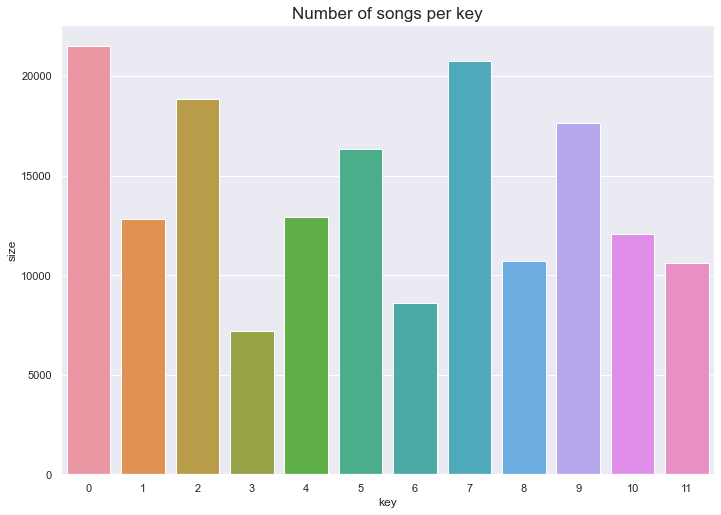

In [25]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

We see a fluctuation across the different key values for the number of songs produced, with no certain pattern in the key value number and the number of songs produced. However, we see that the highest number of songs produced have a key C encoded as the value 0, while the least number of songs are in key D♯, E♭ (also known as Fdouble flat) encided as the value 3.

### Mode
Exploring the mode feature.

*Note: the dataset has been already encoded as - Major mode is represented by 1 and minor mode is 0.*

In [26]:
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)
df3

,mode,size
0,0,49519
1,1,120390


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per mode')

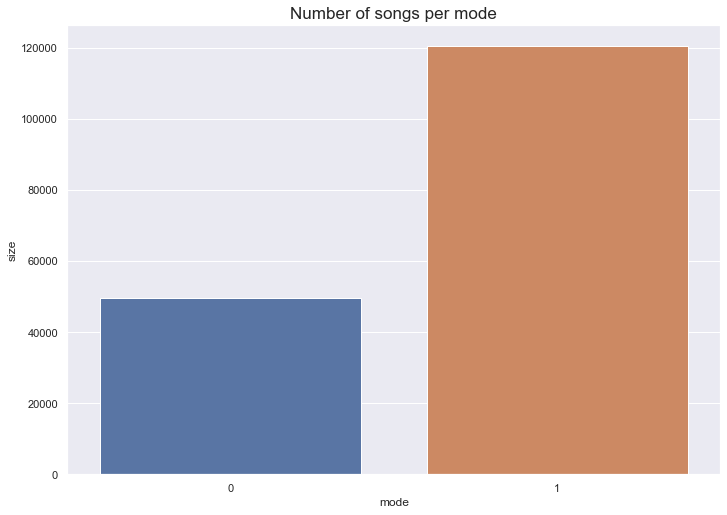

In [27]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

In the plot above, we see that a majority of the tracks are produced in the major modality while a fewer number of songs belong to the minor modality.

### Explicit
Exploring the explicit feature.

*Note: the dataset has been already encoded as - if explicit content present = 1, else = 0*

In [28]:
df4 = df.groupby('explicit', as_index=False).size().sort_values(by='size',ascending=True)
df4

,explicit,size
1,1,14419
0,0,155490


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per explict rate')

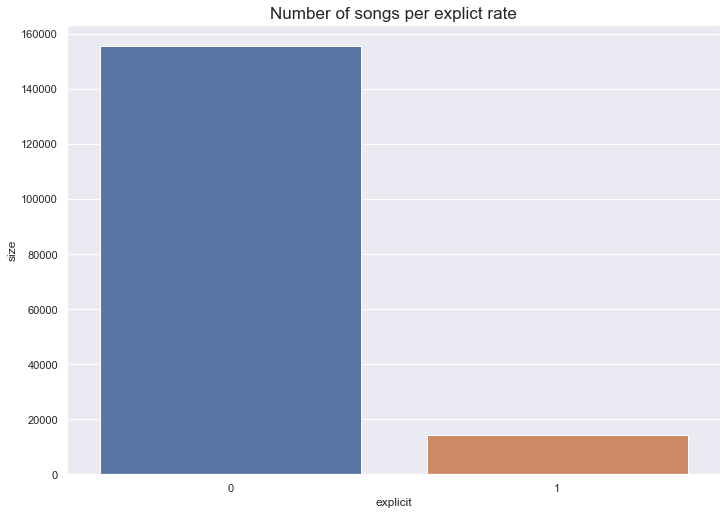

In [29]:
sns.barplot(x='explicit', y='size', data=df4).set_title("Number of songs per explict rate", fontsize=17)

From the plot above, we see that a significantly larger number of were not labelled as explicit, as opposed to the number of songs that were labelled as explicit.

### Year
The year feature considers the year of release of the song. Let's explore this feature further.

In [30]:
print(df['year'].min())
print(df['year'].max())
df['year'].unique()

1921
2020


array([1928, 1930, 1935, 1936, 1940, 1942, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1929, 1931, 1932, 1933, 1934, 1937, 1938, 1939, 1941, 1943,
       1944], dtype=int64)

As we can see from the results above, our dataset includes songs from the year 1921 to 2020.

In [31]:
df1 = df.groupby('year', as_index=False).size().sort_values(by='size',ascending=True)

Text(0.5, 1.0, 'Number of songs per Year')

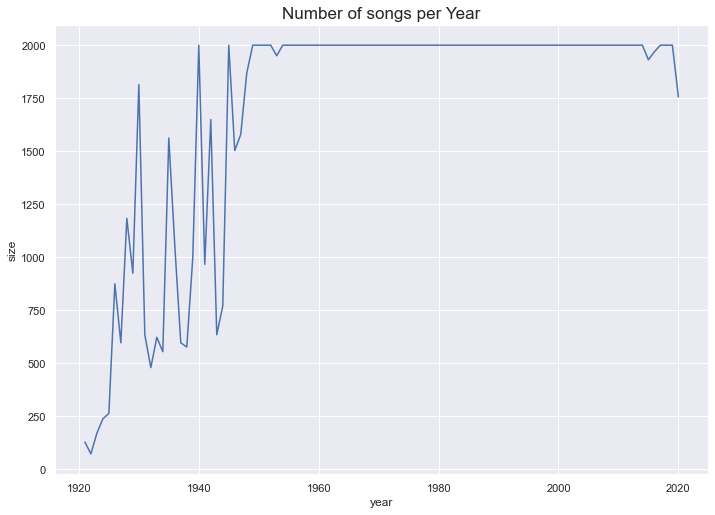

In [32]:
sns.lineplot(x='year', y='size', data=df1).set_title("Number of songs per Year", fontsize=17)

The number of songs in our dataset from 1920 is very few. This can be because spotify does not keep as many records of old songs as opposed to newer songs. The graph peaks in around 1950 and stays quite consistant until 2019. A possible explanation for the drop in 2019 can be because during this time not as many songs were being released due to the lockdown because of the emergence of COVID-19.

As the songs are spread across the different years, let's create year groups to allow  a better visual representation.

In [33]:
df1['Year Bin'] = pd.cut(df1['year'], bins = range(1920,2021,10))

In [34]:
df1.sample(5)

,year,size,Year Bin
14,1935,1562,"(1930, 1940]"
44,1965,2000,"(1960, 1970]"
25,1946,1503,"(1940, 1950]"
38,1959,2000,"(1950, 1960]"
99,2020,1756,"(2010, 2020]"


Let's see how many songs we have in the dataset for each year group:

In [35]:
df1_yearbin = df1.groupby('Year Bin', as_index=False)['size'].sum()
df1_yearbin

,Year Bin,size
0,"(1920, 1930]",6260
1,"(1930, 1940]",9075
2,"(1940, 1950]",14968
3,"(1950, 1960]",19950
4,"(1960, 1970]",20000
5,"(1970, 1980]",20000
6,"(1980, 1990]",20000
7,"(1990, 2000]",20000
8,"(2000, 2010]",20000
9,"(2010, 2020]",19656


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per decade')

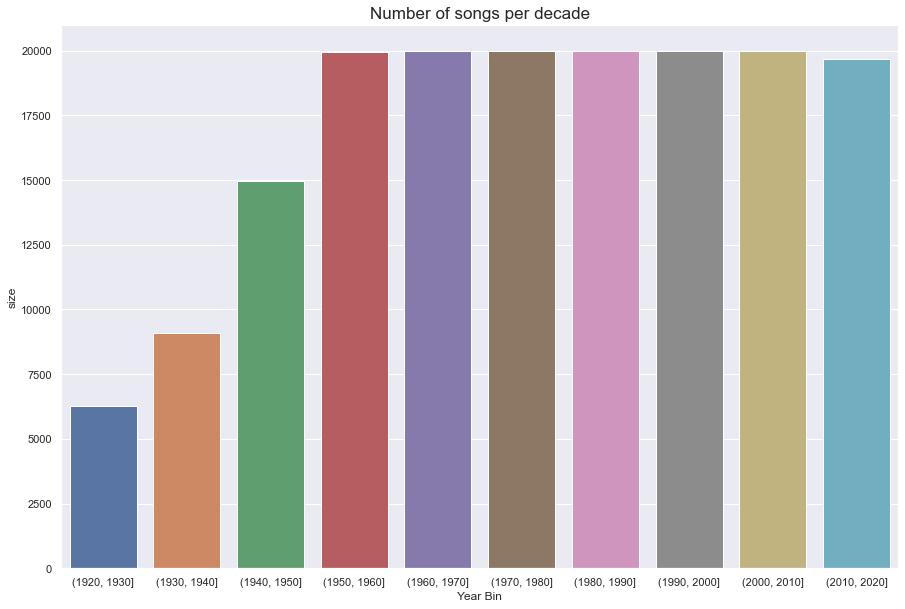

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year Bin', y='size', data=df1_yearbin).set_title("Number of songs per decade", fontsize=17)

From the representation, we cleary see that the number of songs from the year prior to 1940-1949 are much fewer and these rapidly increase to about 20,000 for the year 1950-1959 and are constant until 2000-2009. The number of songs in our dataset decrease in the year group 2010-2019.

### Month
Let's start by exploring the month feature that we defined earlier.

In [37]:
print(df['month'].min())
print(df['month'].max())
df['month'].unique()

1
12


array([ 9, 10,  1,  5,  8,  7, 12,  6, 11,  2,  4,  3], dtype=int64)

In [38]:
df111 = df.groupby('month', as_index=False).size().sort_values(by='size',ascending=True)

Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs in different months across the years')

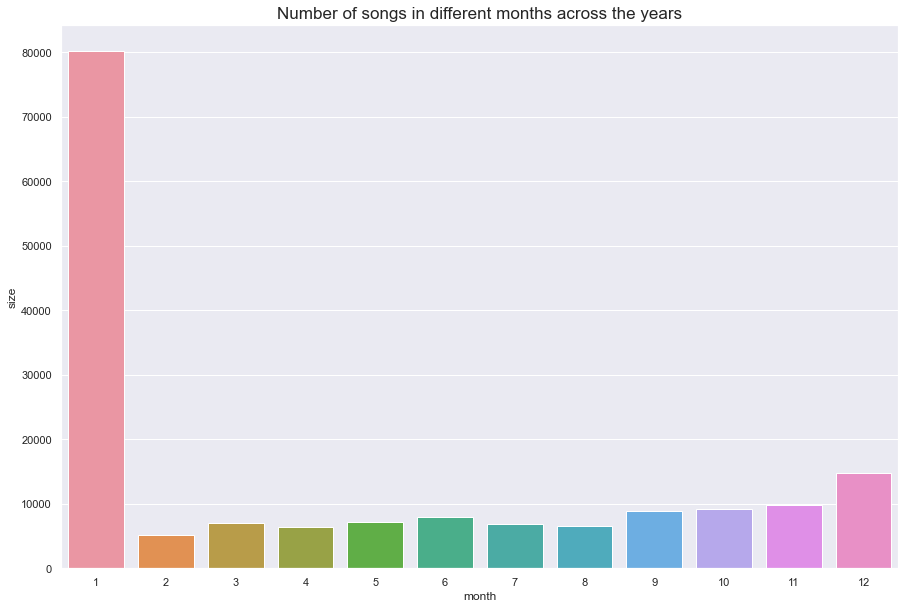

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(x='month', y='size', data=df111).set_title("Number of songs in different months across the years", fontsize=17)

From this exploration, we see that significantly more songs were released in January as compared to the other months. A possible explanation for this can be because this is right during and after the holiday season (eg. Thanksgiving, Christmas and New Year) which means a lot of the songs being released during this time could either be about these events or simply being released at a speciaal time such as new years. Another piece of information that supports this hypothesis is that December has the second highest number of song releases.

Just for reference, here is a similar barplot but without the dummy month details. All songs with missing months have been removed in the following plot and even in this graph we see that January has signicantly more song releases.This justifies why the plot with the dummy variables shows a similar effect.

Text(0.5, 1.0, 'Number of songs in different months across the years (removing the records for the missing months)')

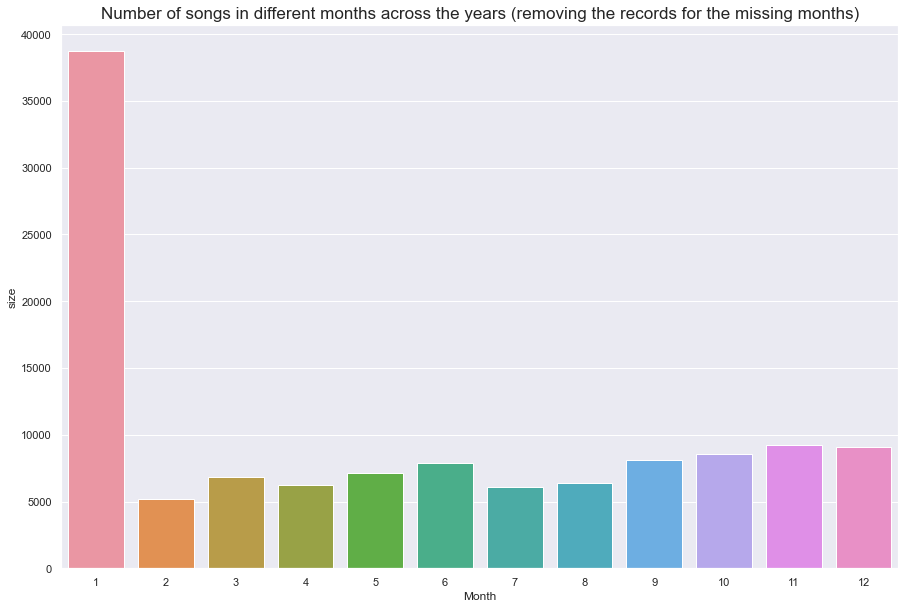

In [40]:
df1112 = proper_dates.groupby('Month', as_index=False).size().sort_values(by='size',ascending=True)
plt.figure(figsize=(15,10))
sns.barplot(x='Month', y='size', data=df1112).set_title("Number of songs in different months across the years (removing the records for the missing months)", fontsize=17)

### Distributions for the rest of the continuous variables

### Popularity
Before exploring the popularity feature, let us get a better undertsanding of how exactly popularity is determined for a song. While the Popularity Index is majorly determined by recent stream count, other factors like save rate, the number of playlists, skip rate, and share rate can indirectly bump up or push down a song’s popularity index.

Now let us explore the popularity feature through a visual representation using a distribution plot.

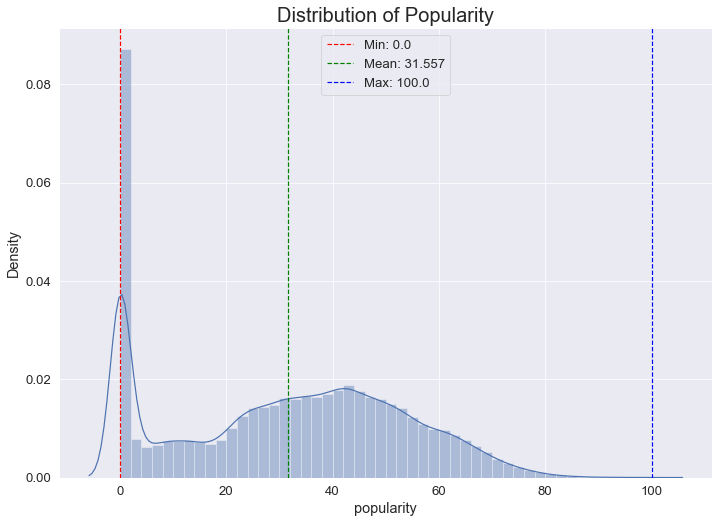

In [41]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Min: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Mean: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

As shown by the distribution above, the distribution of popularity has much fewer number of songs on the right of the halfway mark and significantly larger number of songs on the left. The popularity score with the largest density is 0, whereas the popularity score with the lowest number of density is between 85-100. As mentioned earlier in this notebook, the magic number for song popularity is as low as 50, therefore, it makes sense why very few songs make it between 85-100! 

Spotify displayes how popular a song is **currently** in the spotify ecosystem, and our dataset contains songs from about a century ago, it makes sense why most of the songs are not popular when comparing it to the current spotify ecosystem.

#### Multi class - 5 classes (new feature)

To further explore the populaity feature and distinguish patterns, we split the populaity feature index, which ranges from 0-100, to 5 different categories, namely:
- least popular
- less popular
- mildly popular
- more popular 
- most popular

In [42]:
switcher = {}

for i in range(0, 21):
    switcher[i] = "Least Popular"
for i in range(21, 41): 
    switcher[i] = "Less Popular"
for i in range(41, 61): 
    switcher[i] = "Mildly Popular"
for i in range(61, 81): 
    switcher[i] = "More Popular"
for i in range(81, 101): 
    switcher[i] = "Most Popular"

In [43]:
def decide_class(txt):
    return switcher.get(int(txt))

In [44]:
df_numeric['multi_pop'] = df_numeric['popularity'].apply(decide_class)

In [45]:
df_numeric.sample(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,month,multi_pop
90116,0.972,0.590,1776093.0,0.271,0,0.000066,5,0.2880,-13.122,1,0.0,0.8730,74.337,0.534,1943,12,Least Popular
85944,0.246,0.595,241533.0,0.653,0,0.000000,7,0.2640,-4.935,1,71.0,0.0265,128.930,0.542,2000,10,More Popular
9888,0.958,0.213,430093.0,0.119,0,0.863000,7,0.1210,-18.821,0,20.0,0.0360,76.491,0.069,1957,1,Least Popular
100721,0.689,0.594,288067.0,0.285,0,0.000172,8,0.1570,-11.849,1,17.0,0.0403,96.908,0.654,1954,1,Least Popular
121639,0.380,0.395,166702.0,0.586,0,0.000000,7,0.1580,-11.724,1,43.0,0.1190,158.468,0.552,1975,1,Mildly Popular
132034,0.238,0.669,348800.0,0.315,0,0.000000,11,0.0650,-15.841,1,40.0,0.0300,119.847,0.582,1985,5,Less Popular
84016,0.204,0.286,302640.0,0.758,0,0.000296,2,0.3590,-6.482,0,58.0,0.0587,108.269,0.358,1980,9,Mildly Popular
47374,0.471,0.534,288984.0,0.906,1,0.000000,1,0.7820,-2.316,1,53.0,0.3490,174.058,0.499,2013,11,Mildly Popular
116900,0.994,0.574,190163.0,0.213,0,0.040900,7,0.2220,-11.036,1,0.0,0.0368,100.536,0.423,1927,1,Least Popular
5799,0.563,0.619,220320.0,0.276,0,0.000000,0,0.0849,-9.645,1,48.0,0.0281,104.017,0.516,1997,1,Mildly Popular


In [46]:
df_numeric['multi_pop'] = df_numeric['multi_pop'].astype('category')

In [47]:
df_numeric.multi_pop.dtype

CategoricalDtype(categories=['Least Popular', 'Less Popular', 'Mildly Popular',
                  'More Popular', 'Most Popular'],
, ordered=False)

In [48]:
df4_5 = df_numeric.groupby('multi_pop', as_index=False).size()
df4_5

,multi_pop,size
0,Least Popular,53188
1,Less Popular,51836
2,Mildly Popular,49268
3,More Popular,15160
4,Most Popular,457


Transforming the information above into a visual representation using a barplot.

Text(0, 0.5, '# of Song')

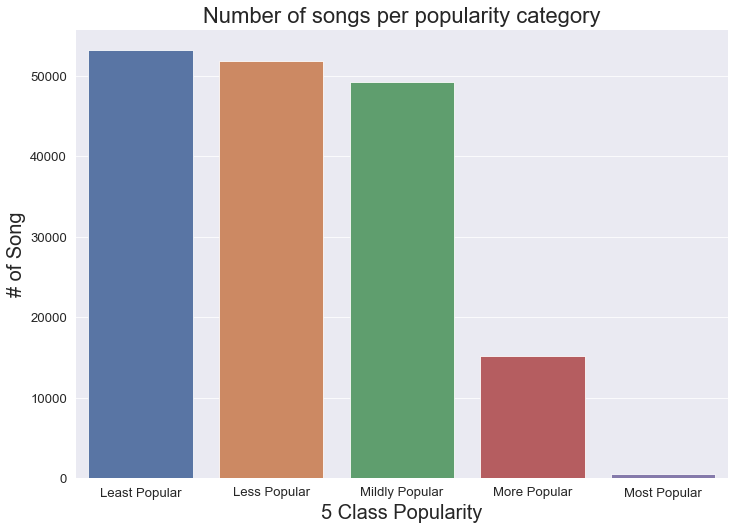

In [49]:
sns.barplot(x='multi_pop', y='size', data=df4_5).set_title("Number of songs per popularity category", fontsize=22)
plt.xlabel("5 Class Popularity", fontsize=20)
plt.ylabel("# of Song", fontsize=20)

Here we see that most of the songs in the dataset are considered to be the least popular, while the better the popularity category gets, the more dificult it gets for songs to be popular (as the fewer the number of songs get).

#### Bin_plot (new feature)

Creating a new feature that represents population through a binary value with a split at 35. We chose 35 as the threshold as this value is close to the mean value of population (as represented in the distribution above). This feature will be helpful later in the modelling section.

In [50]:
df_numeric['bin_pop'] = df_numeric['popularity'].apply(lambda x: 0 if int(x)<35 else 1)

In [51]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,month
79199,0.9420,"['Frankie Carle', 'Marjorie Hughes']",0.779,164160.0,0.2470,0,0.000578,10,0.1530,-12.500,0,Little Jack Frost Get Lost (with Marjorie Hugh...,5.0,1932-12-01,0.0338,135.870,0.7320,1932,12
51371,0.0143,['The Boomtown Rats'],0.321,190200.0,0.8770,0,0.002810,1,0.1220,-3.105,0,Lookin' After No. 1,34.0,1977-01-01,0.0551,179.733,0.7350,1977,1
105427,0.2880,['Michelle Branch'],0.504,251200.0,0.5560,0,0.000246,8,0.1730,-6.190,1,Goodbye to You,56.0,2001-07-31,0.0263,81.008,0.2760,2001,7
18859,0.5630,['Gene Chandler'],0.510,168333.0,0.5890,0,0.000000,9,0.0807,-9.103,0,The Girl Don't Care,20.0,1967-01-01,0.0340,89.574,0.6220,1967,1
48269,0.9780,['Børge Roger Henrichsen & hans Kvintet'],0.598,182567.0,0.1160,0,0.000946,0,0.1570,-19.529,1,Miss Otis Regrets,0.0,1942-11-01,0.0589,115.682,0.4220,1942,11
20447,0.7910,['Jagjit Singh'],0.447,345043.0,0.3940,0,0.000000,8,0.0948,-8.762,1,Hey Govinda Hey Gopala,32.0,1983-06-17,0.0247,104.112,0.4060,1983,6
17449,0.7550,['Unspecified'],0.440,62947.0,0.4750,0,0.962000,10,0.1430,-17.529,1,March,0.0,1953-01-01,0.0483,50.977,0.4700,1953,1
43921,0.0192,['Blondie'],0.624,185707.0,0.6750,0,0.000014,9,0.1070,-7.446,1,Sunday Girl - Remastered,27.0,1979-05-01,0.0423,146.378,0.8480,1979,5
23247,0.5490,['James Blake'],0.775,276720.0,0.2810,0,0.242000,10,0.0941,-10.216,0,Limit To Your Love,57.0,2011-01-01,0.0960,139.949,0.0398,2011,1
145677,0.9850,"['Wolfgang Amadeus Mozart', 'George Szell', 'C...",0.343,747453.0,0.0796,0,0.527000,9,0.0586,-20.425,1,"Clarinet Concerto in A Major, K. 622: I. Allegro",0.0,1947-12-01,0.0419,122.142,0.2670,1947,12


In [52]:
df4_4 = df_numeric.groupby('bin_pop', as_index=False).size().sort_values(by='size',ascending=True)
df4_4

,bin_pop,size
1,1,82152
0,0,87757


Representing this new feature through a barplot.

Text(0, 0.5, '# of Song')

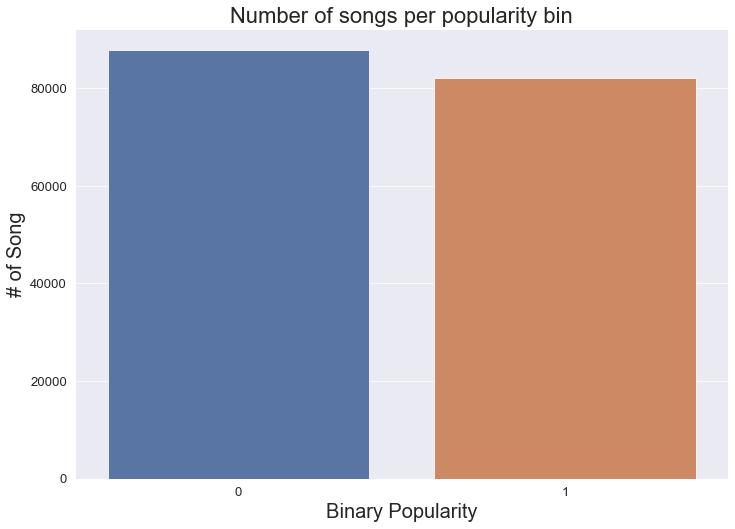

In [53]:
sns.barplot(x='bin_pop', y='size', data=df4_4).set_title("Number of songs per popularity bin", fontsize=22)
plt.xlabel("Binary Popularity", fontsize=20)
plt.ylabel("# of Song", fontsize=20)

As we split the bins close to the mean value of the popularity distribution, both popular and non-popular sizes (represented by 1 and 0 respectively) are close together. 

### Tempo
Exploring the tempo feature through a visual representation using a distribution plot.

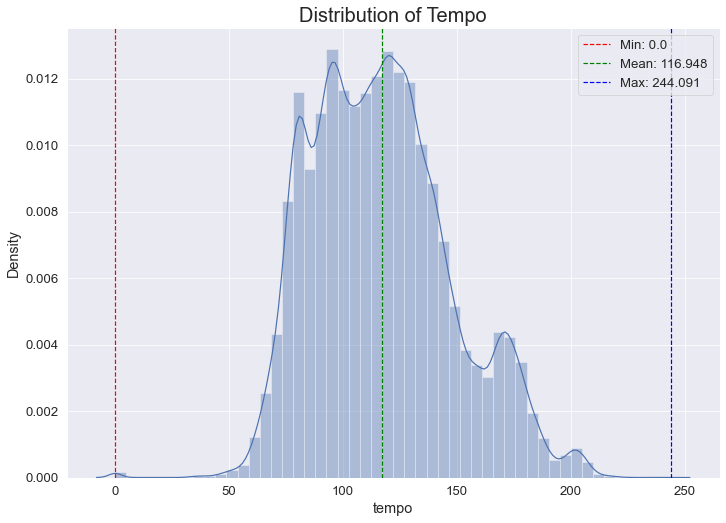

In [54]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Min: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Mean: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

Most of the songs have an average tempo between 80-120 and the tempo values at either ends of the range have fewer songs.

### Acousticness
Exploring the acousticness feature through a visual representation using a distribution plot. 

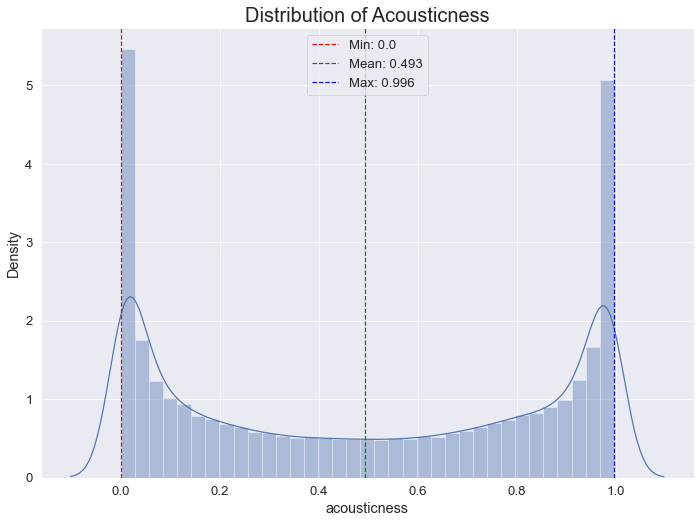

In [55]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Min: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Mean: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The acousticness distribution is represents an upside down bell curve, with the highest distribution being at either ends of the acousticness range and lowest distribution being near the middle of the range. This shows us that most songs are either acoustic or not, with slightly more songs not being acoustic.

### Instrumentalness
Exploring the instrumentalness feature through a visual representation using a distribution plot.

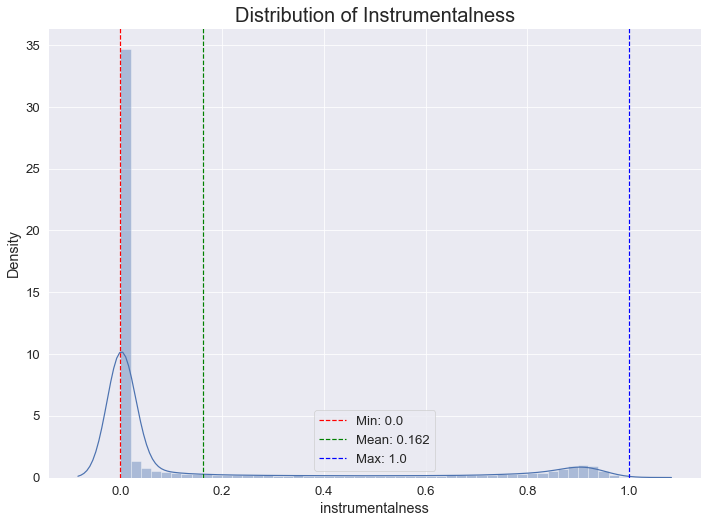

In [56]:
sns.distplot(df.instrumentalness).set_title("Distribution of Instrumentalness", fontsize=20)
plt.axvline(df.instrumentalness.min(), 0,1, label="Min: " + str(df.instrumentalness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.instrumentalness.mean(), 0,1, label="Mean: " + str(round(df.instrumentalness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.instrumentalness.max(), 0,1, label="Max: " + str(df.instrumentalness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The instrumentalness distribution shows us that most of the songs in the dataset are not instrumental. Another small peak at the opposite end of the distribution shows us that are are a bunch of songs that are mostly instrumental.

### Speechiness
Exploring the speechiness feature through a visual representation using a distribution plot.

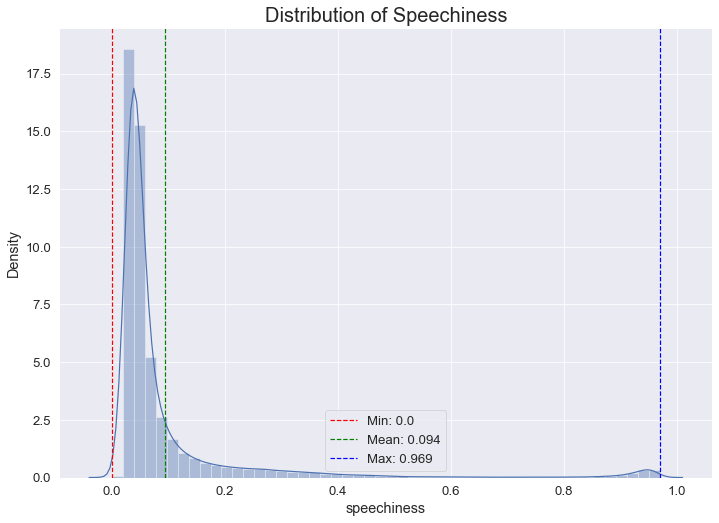

In [57]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Min: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Mean: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The speechiness distribution is extremely skewed to the left with a majority of the songs containing much fewer words. Generally speaking, as the value of speechiness increases, the distribution of songs decreases.

### Valence
Exploring the valence feature through a visual representation using a distribution plot.

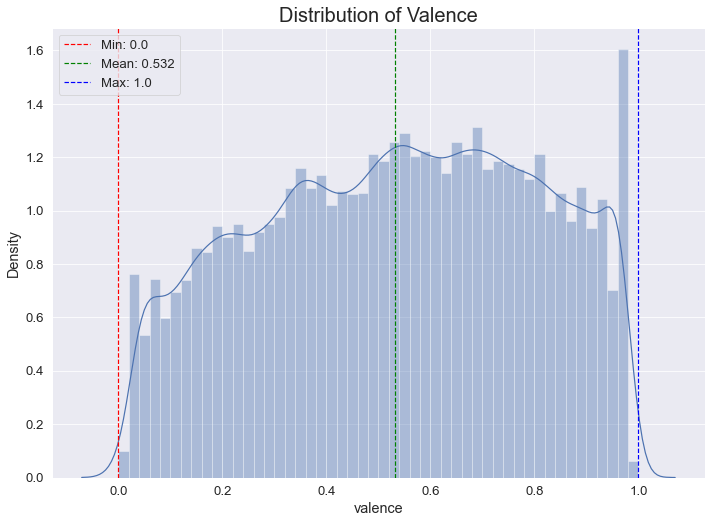

In [58]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Min: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Mean: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

The distribution of valence is more unformly distributed than the other features so far. There is an anamolous value that peaks at a valence of 0.98.

### Danceability
Exploring the danceability feature through a visual representation using a distribution plot.

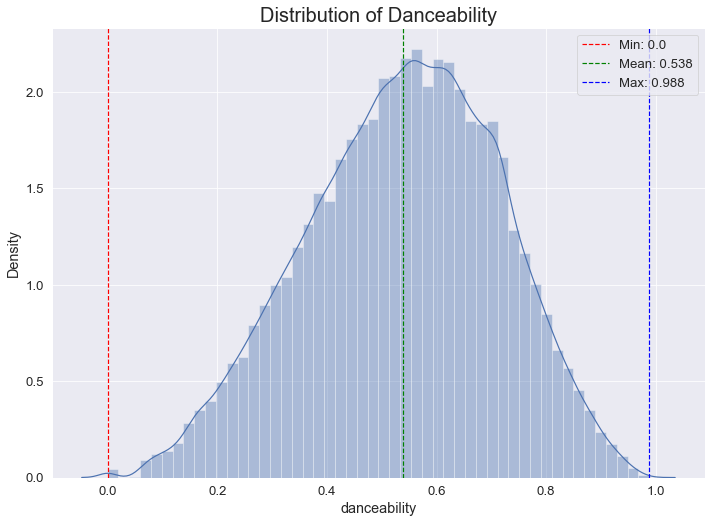

In [59]:
sns.distplot(df.danceability).set_title("Distribution of Danceability", fontsize=20)
plt.axvline(df.danceability.min(), 0,1, label="Min: " + str(df.danceability.min()), color = 'red', linestyle='dashed')
plt.axvline(df.danceability.mean(), 0,1, label="Mean: " + str(round(df.danceability.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.danceability.max(), 0,1, label="Max: " + str(df.danceability.max()), color = 'blue', linestyle='dashed')
plt.legend()

The danceability distribution represents a good bell curve with the mean value being very close to the middle value of the range. Most of the songs have a danceability between 0.4 and 0.8.

### Energy
Exploring the energy feature through a visual representation using a distribution plot.

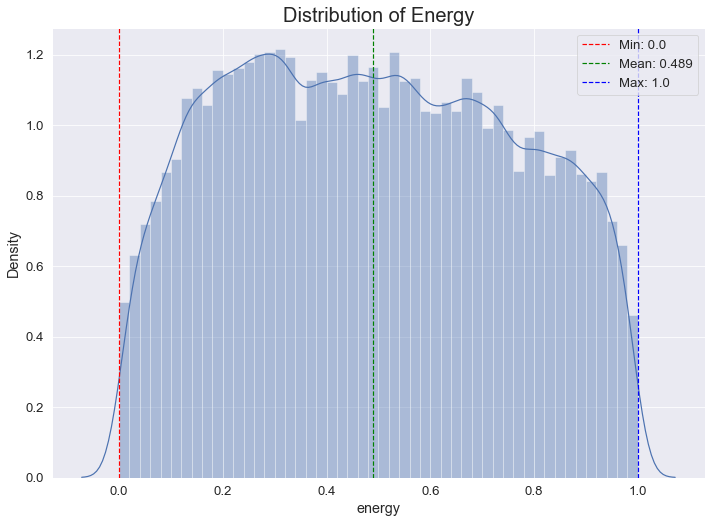

In [60]:
sns.distplot(df.energy).set_title("Distribution of Energy", fontsize=20)
plt.axvline(df.energy.min(), 0,1, label="Min: " + str(df.energy.min()), color = 'red', linestyle='dashed')
plt.axvline(df.energy.mean(), 0,1, label="Mean: " + str(round(df.energy.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.energy.max(), 0,1, label="Max: " + str(df.energy.max()), color = 'blue', linestyle='dashed')
plt.legend()

The energy distribution represents a more unifrom spread with a gradual peak at 0.2 that fluctuates until 0.6. Our dataset contains songs with a good range of different energy measures.

### Liveness
Exploring the liveness feature through a visual representation using a distribution plot.

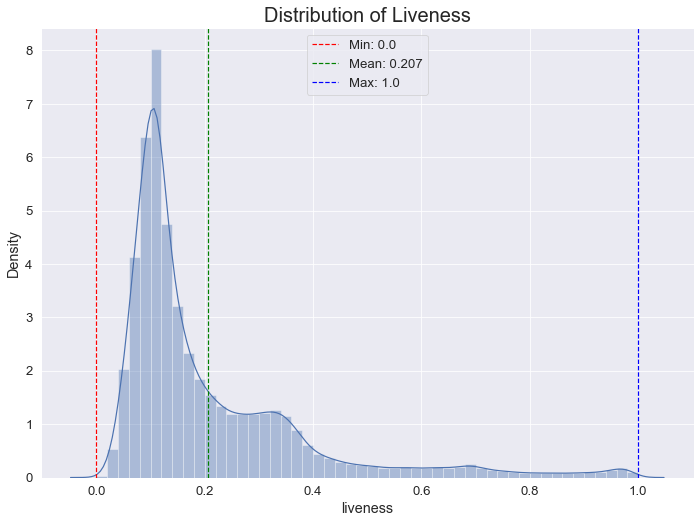

In [61]:
sns.distplot(df.liveness).set_title("Distribution of Liveness", fontsize=20)
plt.axvline(df.liveness.min(), 0,1, label="Min: " + str(df.liveness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.liveness.mean(), 0,1, label="Mean: " + str(round(df.liveness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.liveness.max(), 0,1, label="Max: " + str(df.liveness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The liveness distribution is skewed to the left. This means that most of the songs were not performed in front of an audience. As the liveness score increases, the number of songs decreases, meaning that fewer of the songs were performed in front of a larger (or louder) audience.

### Loudness
Exploring the loudness feature through a visual representation using a distribution plot.

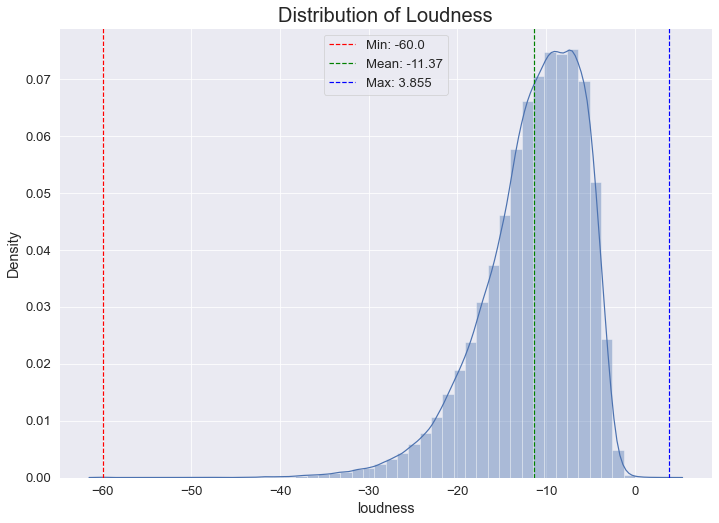

In [62]:
sns.distplot(df.loudness).set_title("Distribution of Loudness", fontsize=20)
plt.axvline(df.loudness.min(), 0,1, label="Min: " + str(df.loudness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.loudness.mean(), 0,1, label="Mean: " + str(round(df.loudness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.loudness.max(), 0,1, label="Max: " + str(df.loudness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The loudness distribution is skewed towards the right with a majority of the songs having a loudness between -15 to -5 db. This shows us that most songs are loud.

### Duration
Exploring the duration feature through a visual representation using a distribution plot.

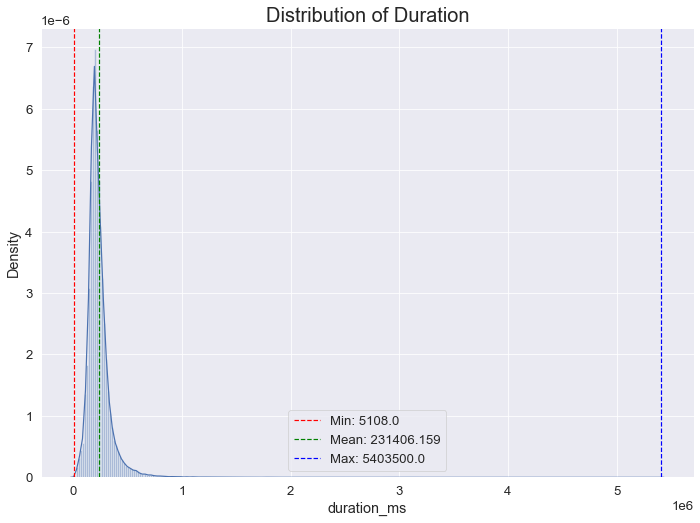

In [63]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

As the majority of the songs have a much lower duration time, shown by the extreme left skewness of the distribution, let's zoom in on this area to get a better understanding of the representation.

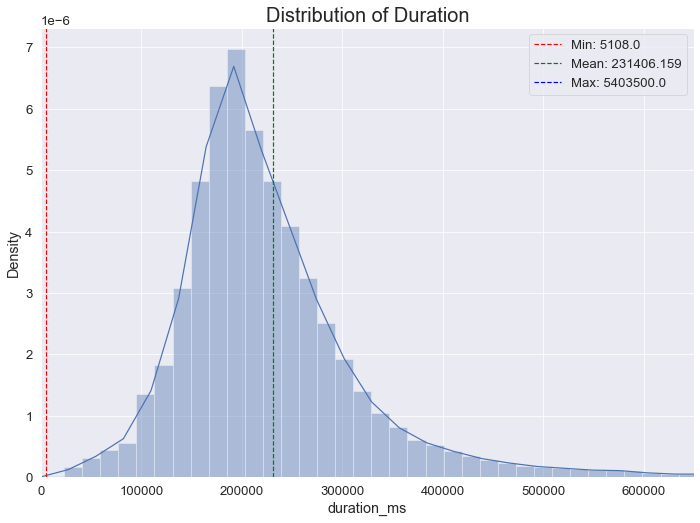

In [64]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

The duration distribution is extremely skewed to the left (as seen the first distribution) with a majority of the songs being short in duration.

## Exploring the Relevant Categorical Variable

Remember when we split the continuous and the categorical variables? Most of the relevant features for popularity prediction are continuous, but now we will be looking at an important categorical variable: Artists! 

<i>** As noted before the other 2 categorical variables are name and release_date. 
Name is not of any importance for our analysis, and the inconsistent release_date feature has been used to create a better feature - Month, which has been explored before.<i>

### Artists
Exploring the artist feature.
The artist names for each song in our dataset are stored in a list. This is because some songs are produced by more than one artists. However, this makes it difficult for us to analyse ou data fo different artists. 

In [65]:
df["artists"]

0                              ['Carl Woitschach']
1         ['Robert Schumann', 'Vladimir Horowitz']
2                          ['Seweryn Goszczyński']
3                             ['Francisco Canaro']
4         ['Frédéric Chopin', 'Vladimir Horowitz']
                            ...                   
169904                      ['DripReport', 'Tyga']
169905          ['Leon Bridges', 'Terrace Martin']
169906                       ['Kygo', 'Oh Wonder']
169907               ['Cash Cash', 'Andy Grammer']
169908                          ['Ingrid Andress']
Name: artists, Length: 169909, dtype: object

We need to remove the artist names from lists while making sure the artist values are still atomic. To do this, we quickly separate multiple artists of songs and analyse that against the number of songs.

In [66]:
all_artists = []
for i in df["artists"]: 
    i = eval(i) #convert string of list to list type
    for j in i:
        all_artists.append(j)
all_artists[:10]

['Carl Woitschach',
 'Robert Schumann',
 'Vladimir Horowitz',
 'Seweryn Goszczyński',
 'Francisco Canaro',
 'Frédéric Chopin',
 'Vladimir Horowitz',
 'Felix Mendelssohn',
 'Vladimir Horowitz',
 'Franz Liszt']

In [67]:
print(len(all_artists))

225456


In [68]:
artists_names = pd.DataFrame(all_artists, columns=['artist'])
artists_names = artists_names.groupby('artist')['artist'].count().reset_index(name="song_count")
artists_names= pd.DataFrame(artists_names.sort_values(by="song_count",  ascending=False))
artists_names

,artist,song_count
8039,Francisco Canaro,2234
27525,Эрнест Хемингуэй,1215
8298,Frédéric Chopin,1035
14826,Ludwig van Beethoven,976
26605,Wolfgang Amadeus Mozart,938
...,...,...
14300,Livingston Taylor,1
14302,"Liz Callaway, Howard McGillin, David Zippel, L...",1
14303,Liz Damon's Orient Express,1
2365,Bernard Leighton,1


Now time to represent the artists and the number of songs produced by them visually through a barplot. However, since the number of artists in our dataset is too large (over 27,000)and we can't represent all of them in a meaningful manner, we will only represent artists that have over 500 songs.

In [69]:
artists_with_more_than_500_songs = artists_names[artists_names['song_count']>500]

<AxesSubplot:xlabel='artist', ylabel='song_count'>

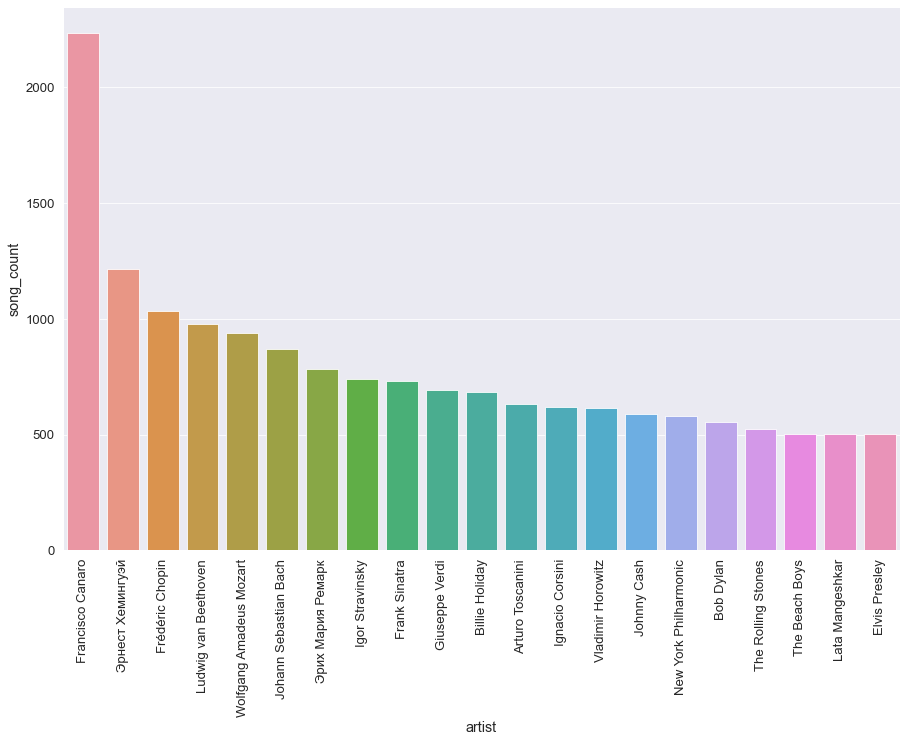

In [70]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x="artist", y="song_count", data=artists_with_more_than_500_songs)

Most of the artists, who have produced over 500 songs, have mostly produced between 500-1000 songs. However, one artist that has produced a significantly greater number of songs and stands out in the representation is Franscisco Canaro with over 2200 songs.

### Feature Trends Over Time

Let's now observe the the different song feature trends over the span of different years represented through line plots. We will do this by grouping the different features by year of release.

Code taken from: https://www.kaggle.com/richardcsuwandi/spotify-time-series-analysis/notebook 

In [71]:
year_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("year").mean().sort_values(by="year").reset_index()

year_avg.sample(10)

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,duration_ms,popularity
75,1996,0.285923,0.591721,0.591788,0.084891,0.200518,117.331936,0.564289,-9.279578,0.087563,248138.924500,44.400500
57,1978,0.316199,0.544783,0.570142,0.098768,0.223904,121.092253,0.594658,-10.764040,0.063965,252205.343500,35.705500
15,1936,0.795903,0.533000,0.306198,0.301757,0.225570,109.981641,0.551709,-13.795905,0.214865,248519.716319,5.010436
38,1959,0.777088,0.488865,0.316798,0.178835,0.196394,112.506105,0.487513,-14.324556,0.071848,216623.042000,19.805000
60,1981,0.292430,0.541870,0.601334,0.154507,0.225453,123.405676,0.583292,-11.037506,0.058252,252524.908500,35.265500
16,1937,0.899631,0.556888,0.286996,0.335734,0.217991,114.591169,0.594565,-13.421020,0.086467,205470.575503,3.550336
97,2018,0.271941,0.664930,0.590591,0.035948,0.171781,122.004325,0.447141,-7.253666,0.128140,200919.119000,67.276000
42,1963,0.712598,0.486331,0.373388,0.190614,0.203516,114.546598,0.549899,-13.602048,0.054633,200297.139500,24.365000
54,1975,0.415704,0.523718,0.534788,0.105966,0.220288,119.095331,0.578469,-11.407781,0.061735,255555.734000,34.662000
0,1921,0.895823,0.425661,0.236784,0.322330,0.215814,100.397758,0.425495,-17.095437,0.077258,229911.914062,0.351562


#### Acousticness, Intrumentalness, Valence and Speechiness Over Time

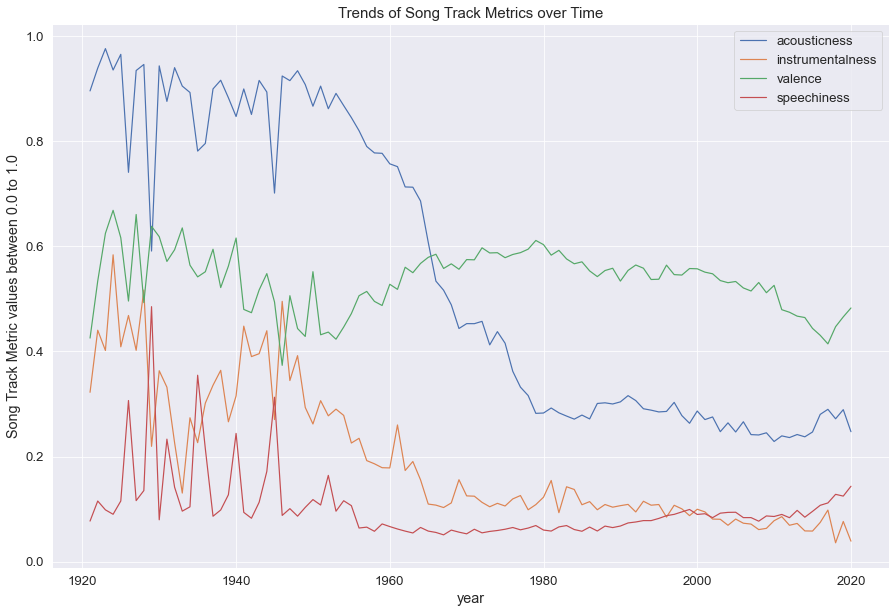

In [72]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Track Metrics over Time", fontdict={"fontsize": 15})

#all these features are within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
plt.ylabel("Song Track Metric values between 0.0 to 1.0")
plt.legend(lines)

Throughout the years (1920-2020) the trend of:
- acousticness in songs has decreased significantly. This means that newer songs have more vocals than older songs.
- instrumentalness in songs has decreased. Meaning that newer songs are not as instrumental as the older songs.
- valence in songs has decreased slightly. Menaing that the musical positiveness conveyed by newer tracks is slightly lower.
- speechiness in songs has decreased slightly. Meaning that newer songs have slightly fewer lyrics.

#### Energy, Danceability and Liveness Over Time

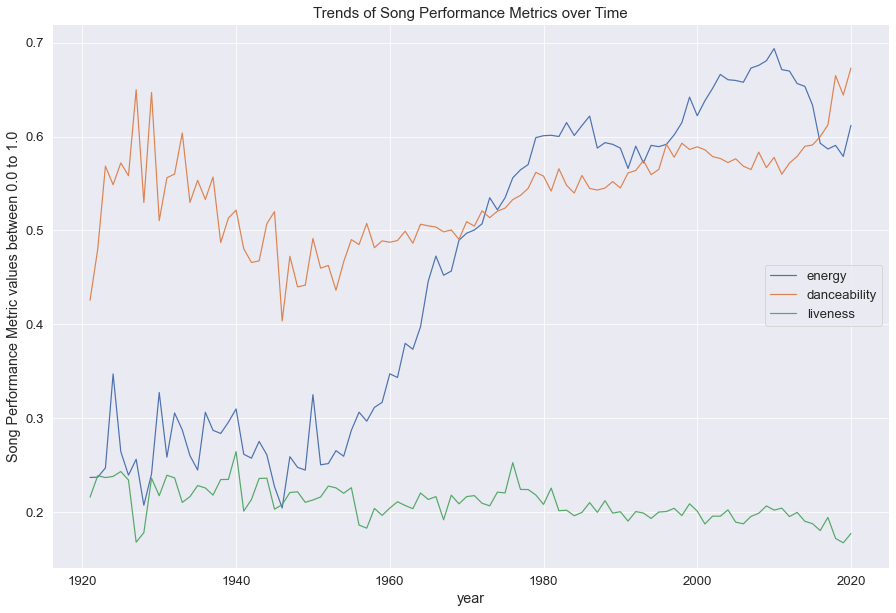

In [73]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Performance Metrics over Time", fontdict={"fontsize": 15})

#all these features are within 0.0 to 1.0 range values
lines = ["energy", "danceability", "liveness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
plt.ylabel("Song Performance Metric values between 0.0 to 1.0")
plt.legend(lines)

Throughout the years (1920-2020) the trend of:
- energy in songs has increased significantly. This means that newer songs are far more more energetic (they have faster beats and are louder).
- danceability in songs shows a dip in the 1960 but has rised to its highestin 2020. Newer songs are slightly more danceable than the songs of 1920. 
- liveness in songs has decreased slightly. This means that fewer songs are performed live now.

####  Popularity Over Time

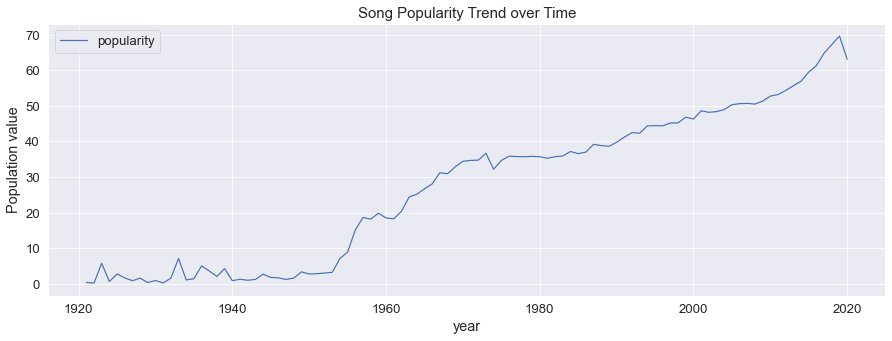

In [74]:
plt.figure(figsize=(15,5))
plt.title("Song Popularity Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='popularity', data=year_avg)
    
plt.ylabel("Population value")
plt.legend(['popularity'])

The general trend shows that newer songs are far more popular than older songs. Since the popularity algorithm gives a big consideration to the recent stream count. This can simply be because the current audience is more aware and can relate better to songs that are more recent.

#### Song Duration Over Time

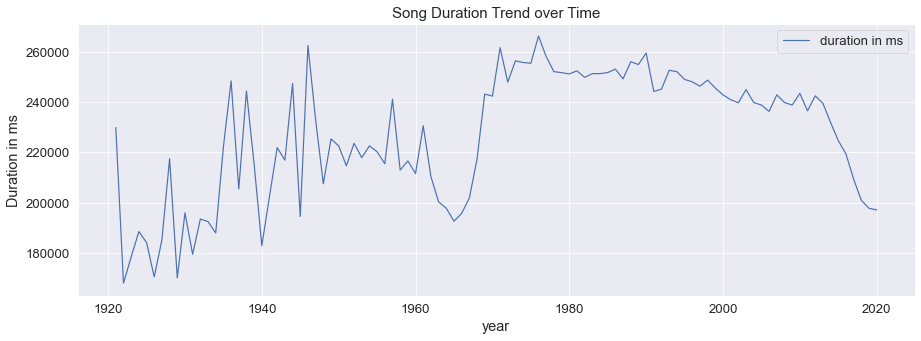

In [75]:
plt.figure(figsize=(15,5))
plt.title("Song Duration Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='duration_ms', data=year_avg)
    
plt.ylabel("Duration in ms")
plt.legend(['duration in ms'])

There is a lot of fluctuation between the lengths of songs across the years. Songs in 1978 were on average the longest and songs in 1922 were on average the shortest. Songs in 2020 are much shorter than in the early 2000's.

#### Song Tempo Over Time

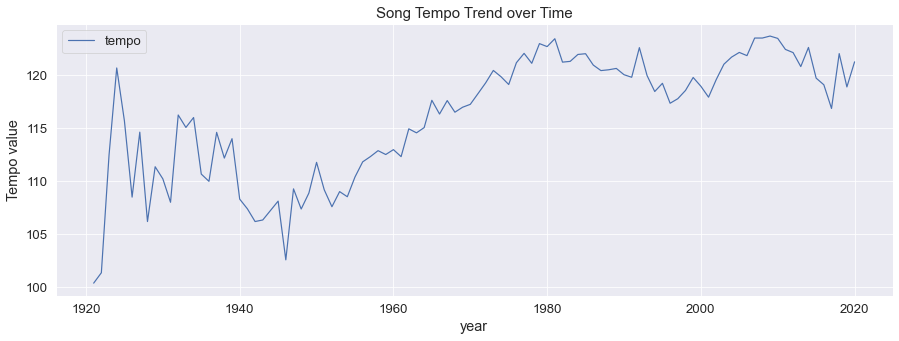

In [76]:
plt.figure(figsize=(15,5))
plt.title("Song Tempo Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='tempo', data=year_avg)
    
plt.ylabel("Tempo value")
plt.legend(['tempo'])

The tempo in songs is much greter now than before. There was a sudden rise in average tempo from the year 1920 to 1925 and a sudden drop to the lowest tempo in the year 1944.

#### Loudness Over Time

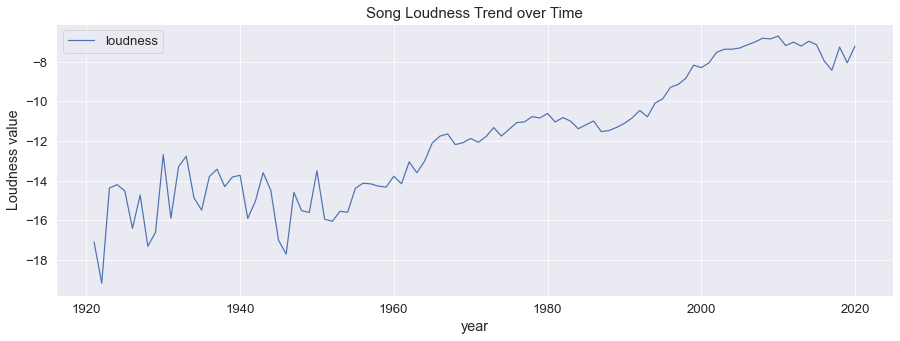

In [77]:
plt.figure(figsize=(15,5))
plt.title("Song Loudness Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='loudness', data=year_avg)
    
plt.ylabel("Loudness value")
plt.legend(['loudness'])

The loudness of songs over the years has increased on average.

### Feature Trends with Popularity

Let's now observe the the different song features against popularity trends. We will do this by plotting the different features by popularity. This is significant for our analysis as our research question depends particularily of the popularity of songs. <br> Now, we know that popularity ranges from 0-100, but plotting boxplots for each of them from 0-100 would create an unclear and repetitive plot. Instead, we will be focusing on the 5 classes of popularity that we defined before as multi_pop (least popular,less popular,mildly popular, more popular, and most popular). We will use multi_pop feature and plot it against the different features to help us get a better understanding of the overall trend between popularity and the other relevant features.

Code reference for subplotting in seaborn: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

#### Acousticness, Intrumentalness, Valence and Speechiness Against Popularity

Text(0.5, 0, 'Popularity')

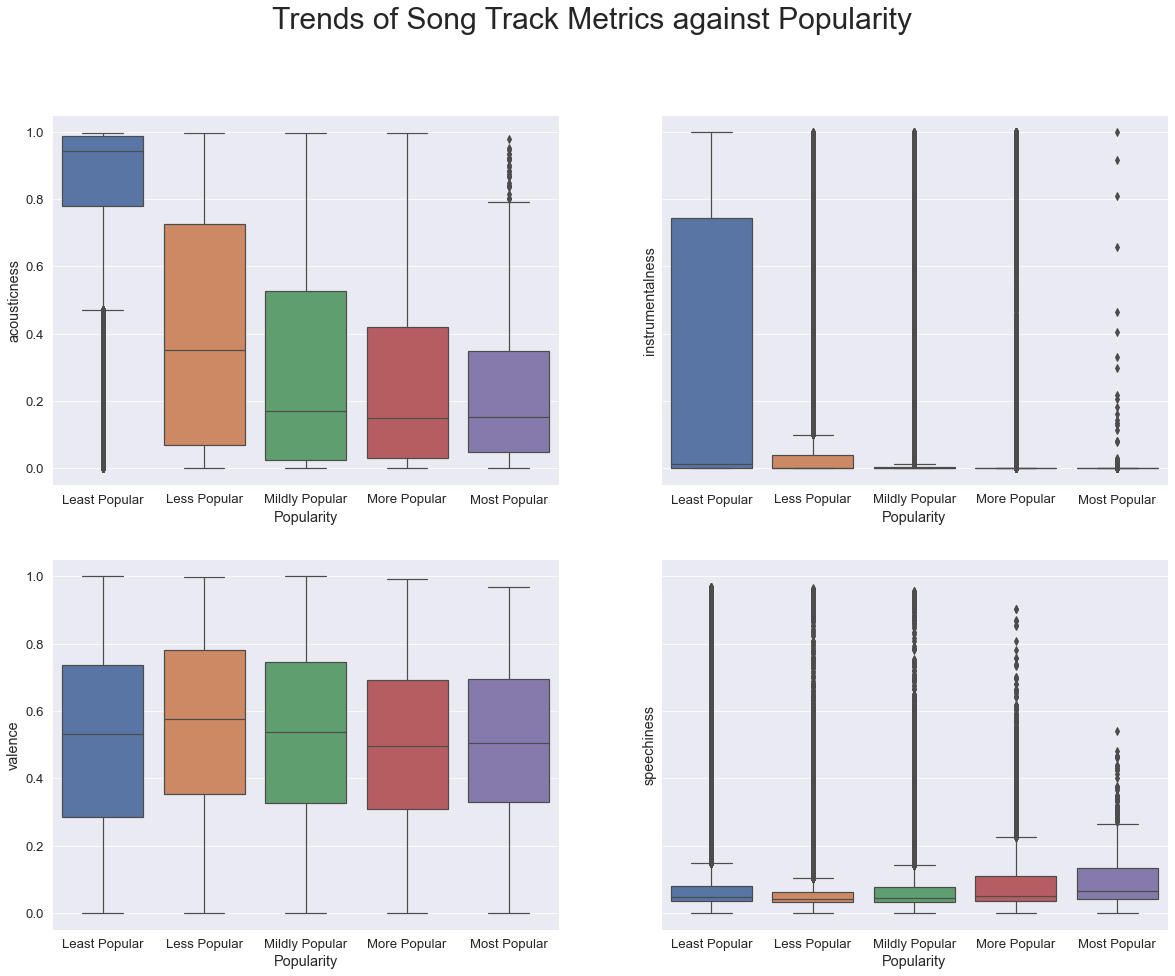

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharey=True)
fig.suptitle("Trends of Song Track Metrics against Popularity", fontsize = 30)

#all these features are within 0.0 to 1.0 range values
sns.boxplot(ax=axes[0][0], x='multi_pop', y='acousticness', data=df_numeric)
axes[0][0].set_xlabel('Popularity')
sns.boxplot(ax=axes[0][1], x='multi_pop', y='instrumentalness', data=df_numeric)
axes[0][1].set_xlabel('Popularity')
sns.boxplot(ax=axes[1][0], x='multi_pop', y='valence', data=df_numeric)
axes[1][0].set_xlabel('Popularity')
sns.boxplot(ax=axes[1][1], x='multi_pop', y='speechiness', data=df_numeric)
axes[1][1].set_xlabel('Popularity')

General trend observed by the boxplots above:
- as the popularity of the songs increases, they tend to have lower acousticness.
- as the popularity of the songs increases, they tend to have lower instrumentalness.
- for the different popularities, the valence is very similar (shows no significant increase or decrease trend).
- for the different popularities, the speechiness is very similar (shows no significant increase or decrease).

#### Energy, Danceability and Liveness Against Popularity

Text(0.5, 0, 'Popularity')

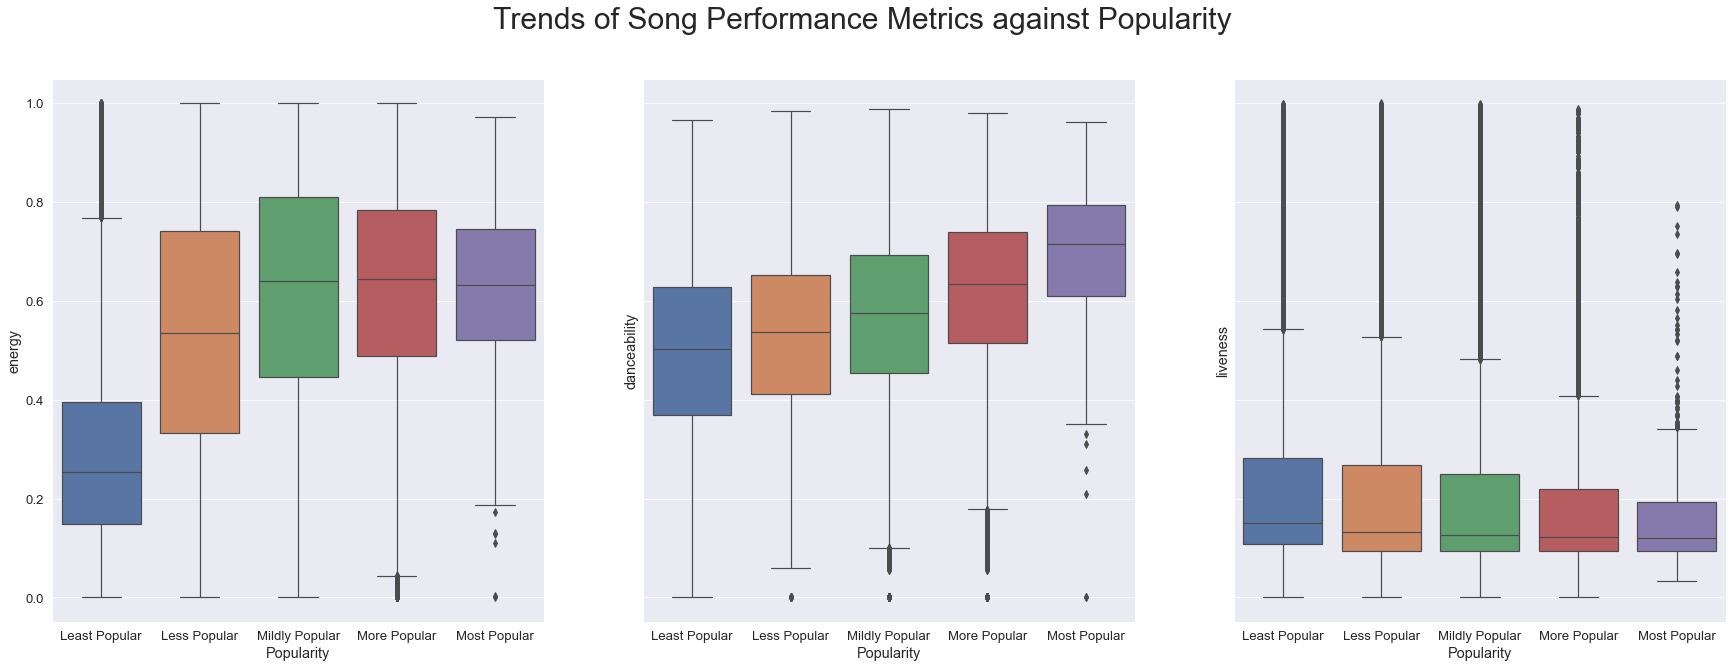

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
fig.suptitle("Trends of Song Performance Metrics against Popularity", fontsize = 30)

#all these features are within 0.0 to 1.0 range values
sns.boxplot(ax=axes[0], x='multi_pop', y='energy', data=df_numeric)
axes[0].set_xlabel('Popularity')
sns.boxplot(ax=axes[1], x='multi_pop', y='danceability', data=df_numeric)
axes[1].set_xlabel('Popularity')
sns.boxplot(ax=axes[2], x='multi_pop', y='liveness', data=df_numeric)
axes[2].set_xlabel('Popularity')

General trend observed by the boxplots above:
- as the popularity of the songs increases, the songs seems to follow a trend of higher energy values.
- as the popularity of the songs increases, they tend to have higher danceability.
- for the different popularities, the liveness feature is similar and has a lower value range (shows no significant increase or decrease trend).

#### Song Duration Against Popularity

Text(0, 0.5, 'Duration in ms')

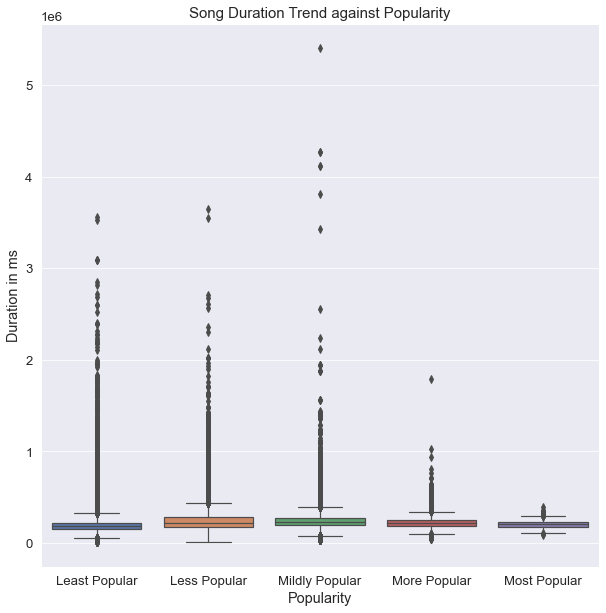

In [81]:
plt.figure(figsize=(10,10))
plt.title("Song Duration Trend against Popularity", fontdict={"fontsize": 15})

ax = sns.boxplot(x='multi_pop', y='duration_ms', data=df_numeric)

plt.xlabel("Popularity")
plt.ylabel("Duration in ms")

Text(0, 0.5, 'Duration in ms')

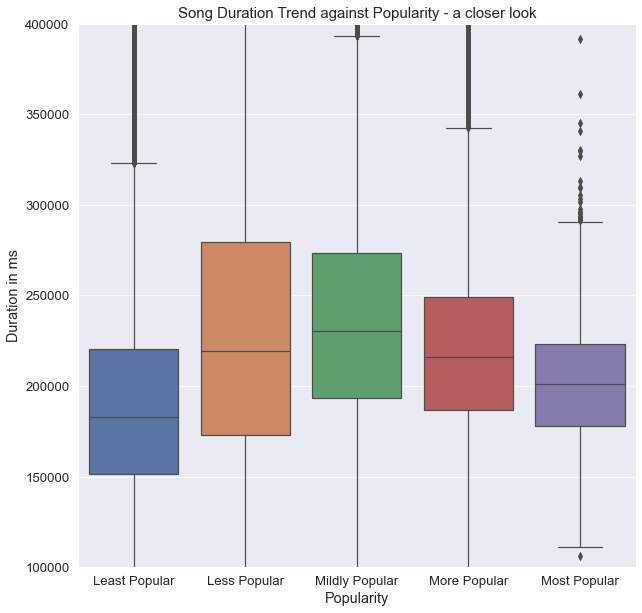

In [82]:
plt.figure(figsize=(10,10))
plt.title("Song Duration Trend against Popularity - a closer look", fontdict={"fontsize": 15})

ax = sns.boxplot(x='multi_pop', y='duration_ms', data=df_numeric)
ax.set_ylim(100000,400000)
    
plt.xlabel("Popularity")
plt.ylabel("Duration in ms")

Here, we can observe that spotify songs, in general, are of shorter durations. <br>And, for the different popularities, the duration is shows a more or less decreasing trend.

#### Song Tempo Against Popularity

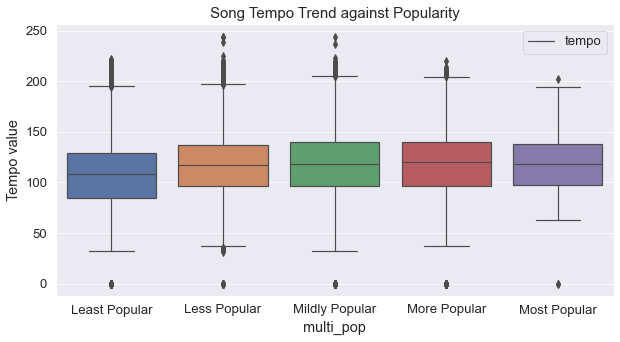

In [83]:
plt.figure(figsize=(10,5))
plt.title("Song Tempo Trend against Popularity", fontdict={"fontsize": 15})

ax = sns.boxplot(x='multi_pop', y='tempo', data=df_numeric)

plt.ylabel("Tempo value")
plt.legend(['tempo'])

On average, songs of different popularities show a similar tempo value, ranging between 80-140. <br> And, so there is no increasing or decreasing trend observed as such.

#### Loudness Against Popularity

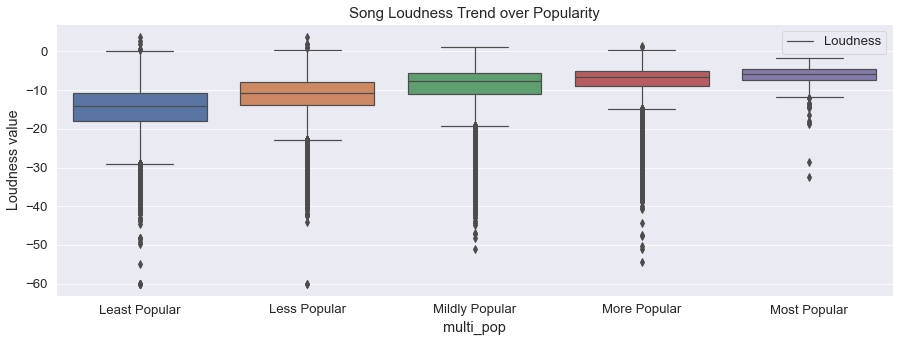

In [84]:
plt.figure(figsize=(15,5))
plt.title("Song Loudness Trend over Popularity", fontdict={"fontsize": 15})

ax = sns.boxplot(x='multi_pop', y='loudness', data=df_numeric)
    
plt.ylabel("Loudness value")
plt.legend(['Loudness'])

As the popularity of the songs increases, the songs seems to follow a trend of higher loudness values too. So, we observe an increasing trend.

#### Song Release Month and Popularity

Text(0, 0.5, 'Mean popularity value')

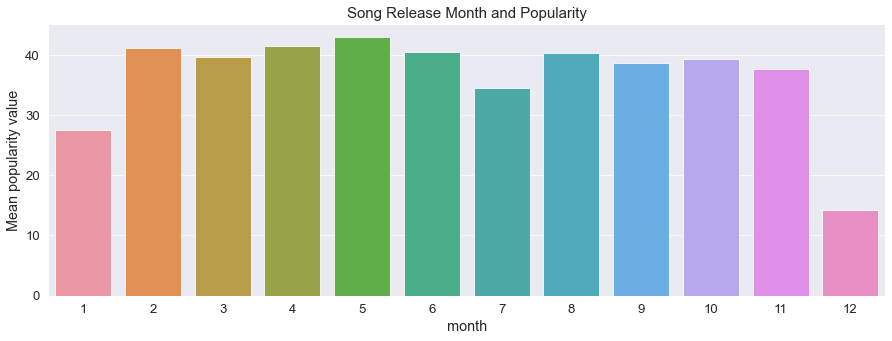

In [85]:
df_monpop= df[['month','popularity']].groupby("month").mean().sort_values(by="popularity").reset_index()
plt.figure(figsize=(15,5))
plt.title("Song Release Month and Popularity", fontdict={"fontsize": 15})

ax = sns.barplot(x='month', y='popularity', data=df_monpop)
    
plt.ylabel("Mean popularity value")

The graph above shows us that the songs that are released in December, January and July are the least popular respectively. While the other songs have a similar mean popularity with slight fluctuations.
And, from this understanding that we have gained, we can assume and reason that December, January and July are the months wherein songs are bring released as 'Holiday songs' or 'Summer songs', and it is the time period of the months that follow December, January and July where these songs gain popularity. 

### General Relationships - Feature Correlations
We will now explore the general replationships between the different features by looking at the correlation values using a heatmap.

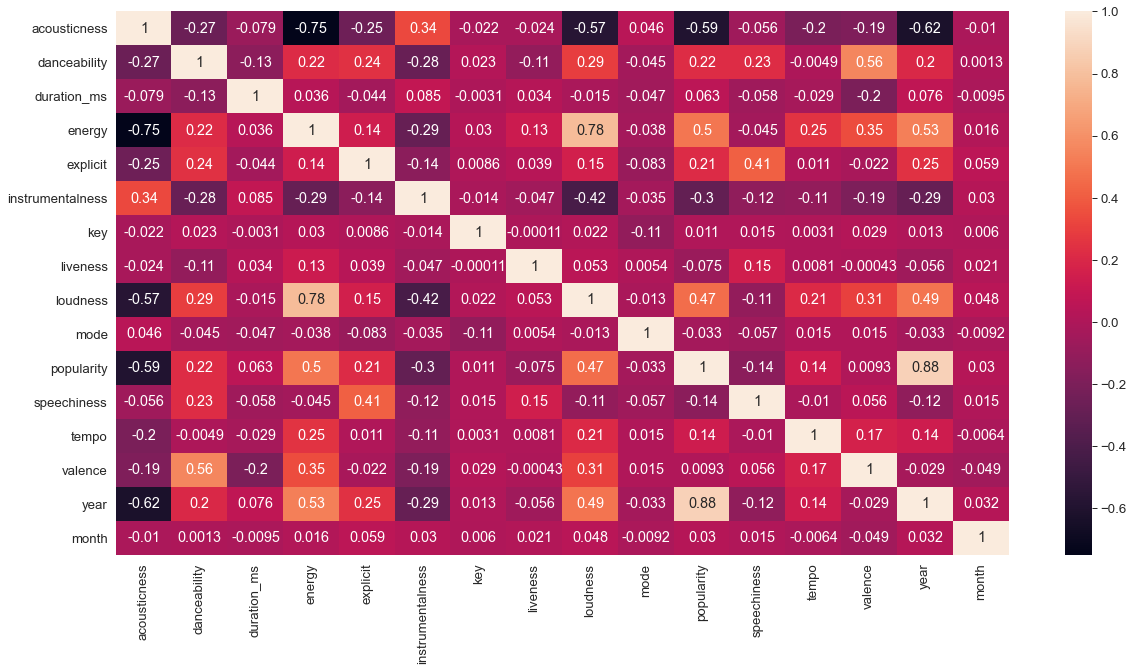

In [86]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

While many of the features above indicate a no or small correlation with each other, some of them stand out with strong correlations. <br> <br>
Out of all variables, *acousticness, danceability, energy, loudness, popularity, valence and year* show some significant correlations. <br>Danceability & valence show a comparatively stronger positive relationship with each other and that is their only significant correlation. <br> 
Now, the rest of the variables from the selected ones are: acousticness, energy, loudness, popularity, and year
- Acousticness has strong negative correlations with the rest of the 4 features (energy, loudness, popularity, and year).  
- Energy and Loudeness features have strong positive correlations with each other and reasonable positive correlations with popularity and year variables. They also have strong negative correlations with acousticness.
- Popularity and Year features have strong positive correlation with each other. They have reasonable positive correlations with energy and loudness variables. They have a negative correlation with acousticness. 


So, in terms of popularity, from all the exploratory analysis and the correlations derived from this heatmap, we can deduce that <br>the 4 variables: **acousticness, energy, loudness,and year have the most impact on popularity**.

## Models and Prediction

### Regression

In [87]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:34:10   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398  

In [88]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:34:11   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398    102.851      0.000      40.123      41.682
acousticness       -23.2082      0.168   -138.233      0.000     -23.537     -22.879
danceability        27.0802      0.298     90.813      0.000      26.496      27.665
duration_ms       5.166e-07   3.29e-07      1.571      0.116   -1.28e-07    1.16e-06
energy              11.1166      0.318     35.013      0.000      10.494      11.739
instrumentalness    -7.0411      0.144    -48.797      0.000      -7.324      -6.758
liveness            -7.6301      0.228    -33.425      0.000      -8.078      -7.183
loudness             0.3234      0.012     26.790      0.000       0.300       0.347
speechiness        -25.7627      0.278    -92.590      0.000     -26.308     -25.217
tempo                0.0256      0.001     19.357      0.000       0.023       0.028
valence            -22.9175      0.197   -116.497      0.000     -23.303     -22.532
==============================================================================
Omnibus:                     7118.213   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.157
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Firstly we assumed popularity to be continuos variable due to being numeric. Thus, we ran regression model hoping to find feature importance based on `p-values`. However, we realized that even though popularity score is numeric yet it is discrete and is more of a classification problem than prediction. Thus, we move on to different model for classification task.

### Decision Trees Multiclass

In [89]:
clf = DecisionTreeClassifier()

In [90]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop', 'month'])
Y = df_numeric['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [91]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [92]:
y_pred = clf.predict(x_test)

In [93]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="weighted"))
print(metrics.recall_score(y_test,y_pred, average="weighted"))
print(metrics.f1_score(y_test,y_pred, average="weighted"))

0.16305691248307927
0.16549234625551218
0.16305691248307927
0.1642076069450366


### Random Forest Multiclass 

In [94]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy')

In [95]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop', 'month'])
Y = df_numeric['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [96]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [97]:
y_pred = rfc.predict(x_test)

In [98]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.19719263139309046
Precision ->  0.15510363802770716
Recall    ->  0.19719263139309046
F1 Score  ->  0.16968511799500124


We started classification task by implementing decision trees and random forest models. But given the performance score, we realized something is wrong. Later we figured that the popularity scores are very close to each other. So in our case, as we are running 100 class classification (each popularity score as one class) our model even if performing well genericly, but we are getting lower performance score because if the true popularity is 27 and our model predicted 26, then we are saying the model predicted incorrectly even thogh it was very close. So to generalize, we binned the popularities into 5 classes (range of 20) instead of 100 classes.

### Decision Trees Multiclass (restricted to 5 classes)

In [99]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop', 'month'])
Y = df_numeric['multi_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [100]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [101]:
y_pred = clf.predict(x_test)

In [102]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="weighted"))
print(metrics.recall_score(y_test,y_pred, average="weighted"))
print(metrics.f1_score(y_test,y_pred, average="weighted"))

0.6524924960273085
0.6538486098793038
0.6524924960273085
0.6531315911834512


### Random Forest Multiclass (restricted to 5 classes)

In [103]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop', 'month'])
Y = df_numeric['multi_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [104]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [105]:
y_pred = rfc.predict(x_test)

In [106]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.7471308339709258
Precision ->  0.7450893159777783
Recall    ->  0.7471308339709258
F1 Score  ->  0.7415115595160554


With 5 class, the performance has improved drastically i.e. now the model is able to predict 5 class more accurately than 100 class because of the closeness. Yet the scores are not very satisfactory. That is due to the bias we saw earlier in the exploratory analysis part - most of the songs fall in the first 3 category. Thus, our model cannot learn well about the later 2 classes. 

Thus, we generalized the popularity scores even further by making it a binary classification problem setting the threshold to close to the average popularity score. And we did check that the binary classification is fairly distributed to both classes.

### Decision Trees Binary

In [107]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop', 'month'])
Y = df_numeric['bin_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [108]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [109]:
y_pred = clf.predict(x_test)

In [110]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="binary"))
print(metrics.recall_score(y_test,y_pred, average="binary"))
print(metrics.f1_score(y_test,y_pred, average="binary"))

0.809487375669472
0.8033511323881422
0.8001100311754997
0.8017273061374495


### Random Forest Binary

In [111]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop', 'month'])
Y = df_numeric['bin_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [112]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [113]:
y_pred = rfc.predict(x_test)

In [114]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="binary"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="binary"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="binary"))

Accuracy  ->  0.8486551703843211
Precision ->  0.8611540443070582
Recall    ->  0.8174093771012898
F1 Score  ->  0.8387117006930724


The performance did improve amazingly with the new technique (binary classification). Yet we are not satisfied. Thus, we will use one more model (SGDClassifier) to double check our results

### SGD Classifier

Firstly, we will start by parameter tuning using grid search CV (5 fold) for SGD Classifier to get better result.

In [76]:
sgd = SGDClassifier()

In [78]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1]
max_iter = [500, 1000, 1500, 2000]
tol = [0.001, 0.01]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
early_stopping = [True]
validation_fraction = [0.15, 0.2, 0.25]
n_iter_no_change = [5, 10]
# Create the random grid
param_grid = {'loss': loss,
               'penalty': penalty,
               'alpha': alpha,
               'max_iter': max_iter,
               'tol': tol,
               'learning_rate': learning_rate,
               'early_stopping': early_stopping,
               'validation_fraction': validation_fraction,
               'n_iter_no_change': n_iter_no_change
            }

In [79]:
grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    cv = 5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'early_stopping': [True],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'max_iter': [500, 1000, 1500, 2000],
                         'n_iter_no_change': [5, 10],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.001, 0.01],
                         'validation_fraction': [0.15, 0.2, 0.25]})

In [81]:
grid_search.best_params_

{'alpha': 0.001,
 'early_stopping': True,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 500,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'tol': 0.001,
 'validation_fraction': 0.25}

In [80]:
best_sgd = grid_search.best_estimator_

In [82]:
y_pred = best_sgd.predict(x_test)

In [86]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="binary"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="binary"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="binary"))

Accuracy  ->  0.48260843976222706
Precision ->  0.4819749447310243
Recall    ->  0.9995109725533345
F1 Score  ->  0.6503460345239042


<font color='red'> 

## Failure!!

</font>

SGD performed very poor than random forest! To interpret the result, SGD was able to identify the true classes most of the time (recall score) but on the otherhand identified huge amount of false class as true! Thus, it was a failed attempt. 

Therefore for models, we will stick with our initial models (Decision Trees and Random Forest)

### Feature Importance

In [65]:
features = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop', 'month'])
feature_list = list(features.columns)

In [66]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: year                 Importance: 0.42
Variable: acousticness         Importance: 0.11
Variable: loudness             Importance: 0.08
Variable: duration_ms          Importance: 0.06
Variable: energy               Importance: 0.06
Variable: speechiness          Importance: 0.05
Variable: danceability         Importance: 0.04
Variable: instrumentalness     Importance: 0.04
Variable: liveness             Importance: 0.04
Variable: tempo                Importance: 0.04
Variable: valence              Importance: 0.04
Variable: key                  Importance: 0.02
Variable: explicit             Importance: 0.01
Variable: mode                 Importance: 0.0


Feature Importance from modelling varifies our exploratory analysis where we found the top important features are `acousticness`, `loudness`, `energy` and `instrumentalness`. Year is still the most important feature. From this we can deduce that latest songs are gaining more popularity over older songs.

### Ranker

In [91]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

In [92]:
x_train.shape

(115537, 14)

In [93]:
query_train = [x_train.shape[0]]
query_val = [x_val.shape[0]]
query_test = [x_test.shape[0]]

In [94]:
params = {
    'objective': 'lambdarank',
    'metric': ['precision', 'ndcg'],   
    'num_leaves': 80,
}

In [95]:
gbm = lgb.LGBMRanker(**params)

In [ ]:
# gbm.fit(
#         X = x_train, 
#         y = y_train, 
#         group=query_train,
#         eval_set=[(x_val, y_val)], 
#         eval_group=[query_val],
#         eval_at=10, 
#         early_stopping_rounds=30)

The motivation to implement a ranker algorithm was to rank popularity for each song i.e. given all the features, we can rank the song for a popularity score between 1 - 100. However, that is not how ranking works. Given a groups of similar items and query, the model tries to rank each item from the group relative to the query. Our project is different from this concept. And due to lack of proper knowledge, we couldn't proceed further on converting the dataset for implementing ranking algorithm as found on [this example](https://towardsdatascience.com/learning-to-rank-with-python-scikit-learn-327a5cfd81f).